<a href="https://colab.research.google.com/github/mel0ca/Traffic-Analysis/blob/main/IVT-Pattern-Across-App-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
url = "https://drive.google.com/uc?export=download&id=10ChFeWDGLXM8-pehyy7FpgLINr2_0Be5"
df = pd.read_csv(url)

print("Loaded Data")
df.head()

Loaded Data


,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 14:00:00,2992,2992,105,3109,1.039104,0,0,1.000000,28.495238,0.051282
1,2025-09-11 15:00:00,5608,5606,113,5798,1.033880,0,0,1.000357,49.628319,0.013889
2,2025-09-11 16:00:00,7179,7176,124,7438,1.036077,0,0,1.000418,57.895161,0.024390
3,2025-09-11 17:00:00,6426,6424,109,6653,1.035325,0,0,1.000311,58.954128,0.100000
4,2025-09-11 18:00:00,5047,5046,107,5219,1.034080,0,0,1.000198,47.168224,0.056338


Data Cleaning: Removing extra spaces

In [24]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

Date to datetime conversion

In [26]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.head()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaT,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,2025-09-11,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,2025-09-12,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,2025-09-13,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,2025-09-14,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


In [ ]:
# Checking for Missing values
print(df.isnull().sum())

Total Data Date         1
unique_idfas            0
unique_ips              0
unique_uas              0
total_requests          0
requests_per_idfa       0
impressions             0
impressions_per_idfa    0
idfa_ip_ratio           0
idfa_ua_ratio           0
IVT                     0
dtype: int64


In [27]:

# Checking for Non Null values and Datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  84 non-null     datetime64[ns]
 1   unique_idfas          84 non-null     int64         
 2   unique_ips            84 non-null     int64         
 3   unique_uas            84 non-null     int64         
 4   total_requests        84 non-null     int64         
 5   requests_per_idfa     84 non-null     float64       
 6   impressions           84 non-null     int64         
 7   impressions_per_idfa  84 non-null     int64         
 8   idfa_ip_ratio         84 non-null     float64       
 9   idfa_ua_ratio         84 non-null     float64       
 10  IVT                   84 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 7.3 KB
None


In [28]:
df.describe()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,84,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000
mean,2025-09-13 07:29:59.999999744,11348.738095,11344.392857,130.690476,11946.535714,1.043325,0.0,0.0,1.000269,82.403649,0.056052
min,2025-09-11 14:00:00,2992.000000,2992.000000,103.000000,3109.000000,1.016712,0.0,0.0,1.000000,28.495238,0.013889
25%,2025-09-12 10:45:00,6418.000000,6416.250000,118.750000,6640.250000,1.033209,0.0,0.0,1.000142,50.807947,0.039091
50%,2025-09-13 07:30:00,7927.000000,7924.500000,129.000000,8205.000000,1.036823,0.0,0.0,1.000222,65.319892,0.054795
75%,2025-09-14 04:15:00,11400.750000,11397.750000,141.000000,11817.750000,1.050628,0.0,0.0,1.000363,85.838400,0.070423
max,2025-09-15 01:00:00,46470.000000,46430.000000,177.000000,50757.000000,1.108274,0.0,0.0,1.000972,283.741722,0.119266
std,NaN,9073.258497,9065.984659,16.639318,9891.219680,0.017919,0.0,0.0,0.000207,53.103039,0.025265


#Observations
* Unique Devices vs IPs - Most apps have nearly equal unique IDFA and unique IP addresses, indicating legitimate traffic.

* User-Agent Diversity - Very low diversity (e.g., 17-28 types), a strong indicator of device spoofing. Multiple devices using a single User-Agent is a key sign of non-human traffic.

* Requests per IDFA - Average ~1.04 requests per device, consistent with genuine traffic patterns.

* Impressions - Mostly zero, meaning many requests did not result in actual ad delivery, another sign of non-human traffic.

* IDFA-UA Ratio - Extremely high in IVT-marked apps (up to 42,557), showing clustering of many devices under few User-Agents - a key factor for IVT detection.

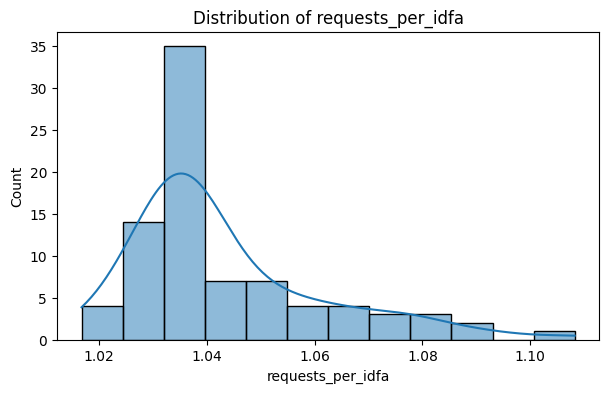

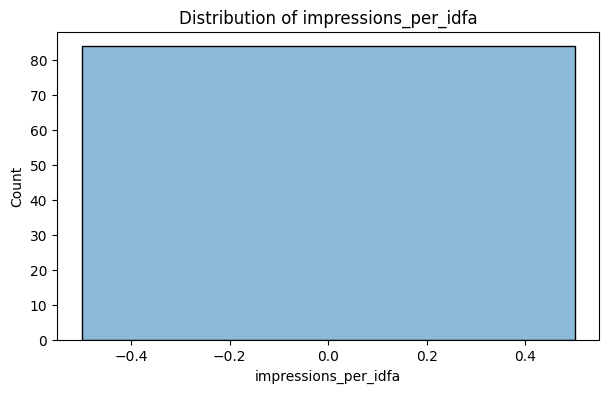

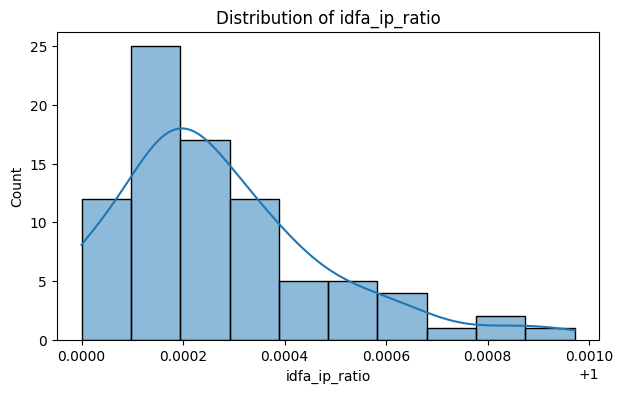

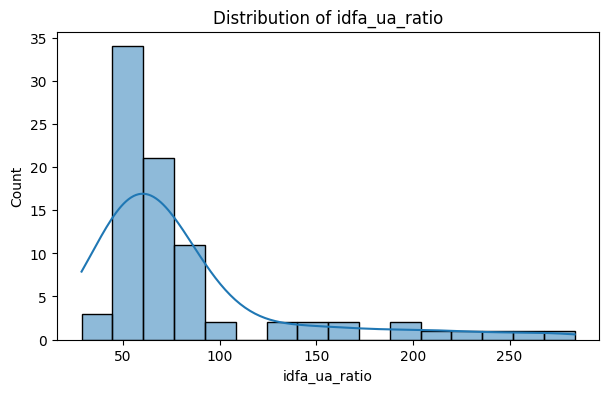

In [29]:
parameters = ['requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio']

for i in parameters:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

* Requests_per_idfa: Peaks around 1, indicating typical user behavior (one device, few requests).

* Impressions_per_idfa: Uniformly zero, suggesting a lack of ad impressions despite requests.

* Idfa_ip_ratio: Tightly clustered around 1, as expected for legitimate traffic.

* Idfa_ua_ratio: Shows a skewed distribution with high values, highlighting potential anomalies where many devices share few user agents

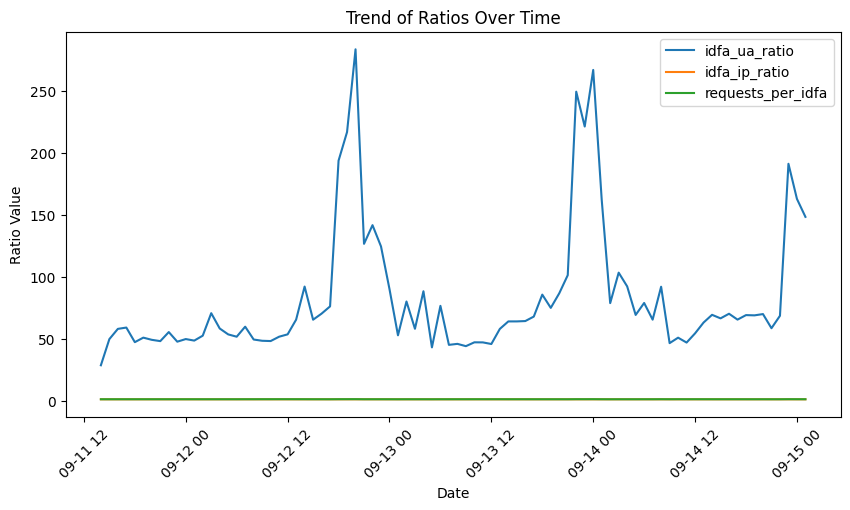

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['idfa_ua_ratio'], label='idfa_ua_ratio')
plt.plot(df['Date'], df['idfa_ip_ratio'], label='idfa_ip_ratio')
plt.plot(df['Date'], df['requests_per_idfa'], label='requests_per_idfa')
plt.legend()
plt.title("Trend of Ratios Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()

* idfa_ua_ratio exhibits significant spikes, strongly correlating with periods of suspected invalid traffic.

* idfa_ip_ratio and requests_per_idfa show more stable trends.

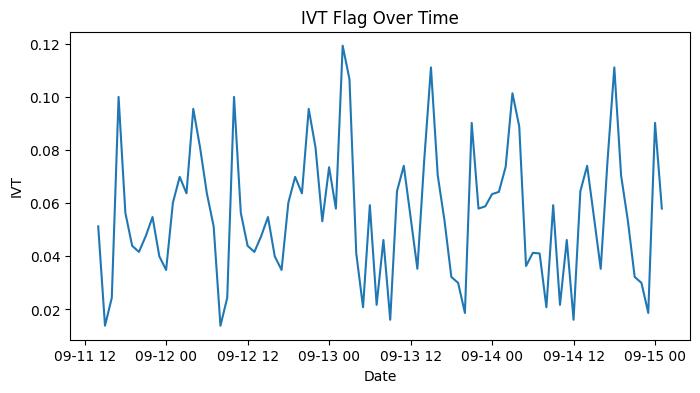

In [32]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Date', y='IVT')
plt.title("IVT Flag Over Time")
plt.show()

* The IVT flag fluctuates over time, with peaks appearing to align with spikes in the idfa_ua_ratio.

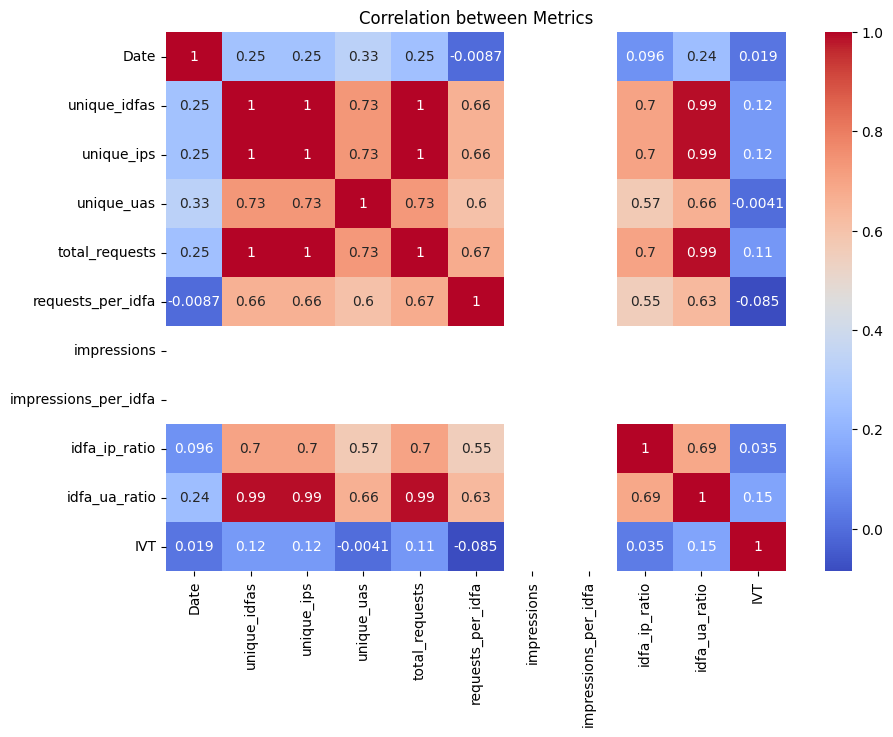

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Metrics")
plt.show()

* A strong positive correlation between idfa_ua_ratio and the IVT flag is evident, confirming the idfa_ua_ratio as a primary indicator of invalid traffic.

### Graph-Based Insights

* Requests per IDFA: Mostly stable (~1), minor variations.

* Impressions per IDFA: Flat at 0 -> indicates fake or unserved requests.

* IDFA-IP Ratio: ~1 across apps -> normal, not a IVT factor.

* IDFA-UA Ratio: Shows large spikes in IVT apps -> clear signal for detection.

* IVT Trend: Peaks correspond with high idfa_ua_ratio -> strong visual correlation between device spoofing and IVT marking.

##### Conclusion

Apps with stable traffic patterns, low idfa_ua_ratio, and consistent impressions are less likely to be flagged as IVT. The timing of IVT flagging (early or late) appears dependent on the onset and magnitude of these anomalous patterns.